# US Counties Coronavirus Cases and Deaths Trends

CA's [Blueprint for a Safer Economy](https://www.cdph.ca.gov/Programs/CID/DCDC/Pages/COVID-19/COVID19CountyMonitoringOverview.aspx) assigns each county [to a tier](https://www.cdph.ca.gov/Programs/CID/DCDC/Pages/COVID-19/COVID19CountyMonitoringOverview.aspx) based on case rate and test positivity rate. What's opened / closed [under each tier](https://www.cdph.ca.gov/Programs/CID/DCDC/CDPH%20Document%20Library/COVID-19/Dimmer-Framework-August_2020.pdf).

Tiers, from most severe to least severe, categorizes coronavirus spread as <strong><span style='color:#6B1F84'>widespread; </span></strong>
<strong><span style='color:#F3324C'>substantial; </span></strong><strong><span style='color:#F7AE1D'>moderate; </span></strong><strong><span style = 'color:#D0E700'>or minimal.</span></strong>

We apply CA's tier categories to other US counties to help us understand the severity of the spread. 

**Related: [CA counties report on cases, deaths, and hospitalizations](https://cityoflosangeles.github.io/covid19-indicators/ca-county-trends.html)**
<br>
**[Los Angeles County, detailed indicators](https://cityoflosangeles.github.io/coronavirus-stats.html)**
<br> 
Code available in GitHub: [https://github.com/CityOfLosAngeles/covid19-indicators](https://github.com/CityOfLosAngeles/covid19-indicators)

In [1]:
import altair as alt
import altair_saver
import os
import pandas as pd

import default_parameters
import make_charts
import us_county_utils

from IPython.display import display_html, Markdown, HTML, Image

# Default parameters
time_zone = default_parameters.time_zone
start_date = default_parameters.start_date
today_date = default_parameters.today_date

fulldate_format = default_parameters.fulldate_format

In [2]:
northeast_midatlantic = [
    "District of Columbia, DC", 
    "Suffolk, MA", # Boston
    "New York, NY", 
    "Philadelphia, PA", "Allegheny, PA", # Pittsburg
    "Richmond City, VA", "Arlington, VA", "Fairfax, VA"
]

midwest = [
    "Cook, IL", 
    "Hamilton, OH", # Cincinnati
    "Fayette, KY", # Lexington
    "Hennepin, MN", # Minneapolis
    "St. Louis, MO",
]

southeast = [
    "Mecklenburg, NC", # Charlotte
    "Richland, SC", # Columbia
    "Shelby, TN", # Memphis
    "Davidson, TN", # Nashville
    "Fulton, GA", # Atlanta
    "Orange, FL", # Orlando
    "Travis, TX", # Austin
    "Dallas, TX", 
    "Harris, TX", # Houston
]

west_northwest = [
    "Multnomah, OR", # Portland
    "King, WA", # Seattle
    "Maricopa, AZ", # Phoenix
    "Clark, NV", # Las Vegas
    "Salt Lake, UT", # Salt Lake City
    "Denver, CO",
]


# Put all states and counties into list
include_counties = northeast_midatlantic + midwest + southeast + west_northwest

# Map counties to major cities
major_city_dict = {
    # Northeast
    'District of Columbia, DC': 'Washington DC',
    'Suffolk, MA': 'Boston',
    'New York, NY': 'New York City',
    'Philadelphia, PA': 'Philadelphia',
    'Allegheny, PA': 'Pittsburgh',
    # Mid-Atlantic
    'Richmond City, VA': 'Richmond',
    'Arlington, VA': 'Arlington',
    'Fairfax, VA': 'Fairfax',
    # Midwest
    'Cook, IL': 'Chicago',
    'Hamilton, OH': 'Cincinnati',
    'Fayette, KY': 'Lexington',
    'Hennepin, MN': 'Minneapolis',
    'St. Louis, MO': 'St Louis',
    # Southeast / South
    'Mecklenburg, NC': 'Charlotte',
    'Richland, SC': 'Columbia',
    'Shelby, TN': 'Memphis',
    'Davidson, TN': 'Nashville',
    'Fulton, GA': 'Atlanta',
    'Orange, FL': 'Orlando',
    'Travis, TX': 'Austin',
    'Dallas, TX': 'Dallas', 
    'Harris, TX': 'Houston',
    # Northwest / West
    'Multnomah, OR': 'Portland',
    'King, WA': 'Seattle',
    'Maricopa, AZ': 'Phoenix',
    'Clark, NV': 'Las Vegas',
    'Salt Lake, UT': 'Salt Lake City',
    'Denver, CO': 'Denver',
}

In [3]:
jhu = us_county_utils.clean_jhu(start_date)

jhu = jhu.assign(
    county_state = jhu.county + ", " + jhu.state_abbrev
)

jhu = (jhu[jhu.county_state.isin(include_counties)]
      .assign(
          major_city = jhu.county_state.map(major_city_dict)
      ).drop(columns = "county_state")
     )

data_through = jhu.date.max()

In [4]:
display(Markdown(
    f"Report updated: {default_parameters.today_date.strftime(fulldate_format)}; "
    f"data available through {data_through.strftime(fulldate_format)}")
)

Report updated: 11/20/20; data available through 11/19/20

In [5]:
title_font_size = 9
font_name = make_charts.font_name
grid_opacity = make_charts.grid_opacity
domain_opacity = make_charts.domain_opacity
stroke_opacity = make_charts.stroke_opacity
chart_width = make_charts.chart_width
chart_height = make_charts.chart_height


def plot_charts(cases_df, county_name):
    cases_df = cases_df[cases_df.county==county_name]
    
    name = cases_df.county.iloc[0]
    STATE = cases_df.state_abbrev.iloc[0]
    
    cases_chart, deaths_chart = make_charts.setup_cases_deaths_chart(cases_df, "county", name)
    
    chart = (alt.hconcat(cases_chart, deaths_chart)
             .configure_title(
                 fontSize=title_font_size, font=font_name, anchor="middle", color="black"
             ).configure_axis(
                 gridOpacity=grid_opacity, domainOpacity=domain_opacity
             ).configure_view(strokeOpacity=stroke_opacity)
            )
    
    major_city_name = cases_df.major_city.iloc[0]
    county_state_name = county_name + f", {STATE}"
    display(Markdown(f"#### {major_city_name} ({county_state_name})"))
    us_county_utils.county_caption(cases_df, county_name)

    make_charts.show_svg(chart)

<strong>Cases chart, explained</strong>

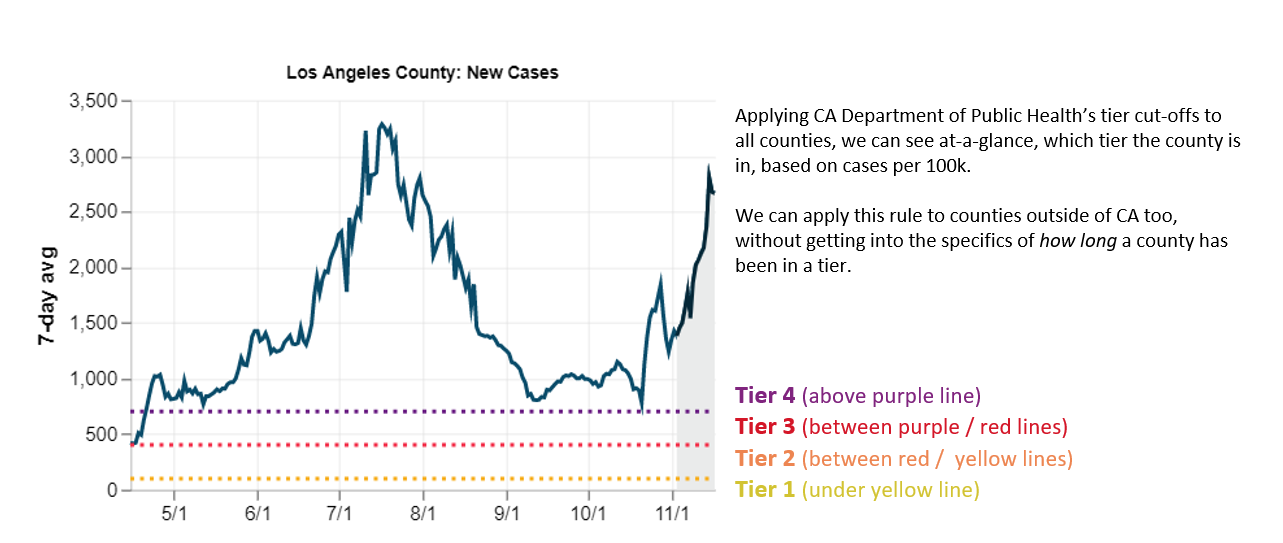

In [6]:
display(Markdown("<strong>Cases chart, explained</strong>"))
Image("../notebooks/chart_parts_explained.png", width=700)

## Select by Major City
<strong>Northeast:</strong> [Boston](#suffolk), 
[New York City](#new_york), 
[Philadelphia](#philadelphia), 
[Pittsburgh](#pittsburgh) 
<br>
<strong>Mid-Atlantic: </strong> [Washington DC](#dc), 
[Arlington](#arlington),
[Fairfax](#fairfax),
[Richmond](#richmond)
<br>
<strong>Midwest:</strong> [Chicago](#chicago), 
[Cincinnati](#cincinnati), 
[Lexington](#lexington),
[Minneapolis](#minneapolis),
[St Louis](#st_louis)
<br>
<strong>South / Southeast:</strong> [Charlotte](#charlotte), 
[Columbia](#columbia), 
[Memphis](#memphis), 
[Nashville](#nashville),
[Atlanta](#atlanta),
[Orlando](#orlando),
[Austin](#austin),
[Dallas](#dallas),
[Houston](#houston)
<br>
<strong>West / Northwest:</strong> [Portland](#portland), 
[Seattle](#seattle),
[Phoenix](#phoenix),
[Las Vegas](#las_vegas),
[Salt Lake City](#salt_lake_city),
[Denver](#denver)
<br>
<strong>California:</strong> [All CA counties](https://cityoflosangeles.github.io/covid19-indicators/ca-county-trends.html)

<br>
Note for <i>small values</i>: If the 7-day rolling average of new cases or new deaths is under 10, the 7-day rolling average is listed for the past week, rather than a percent change. Given that it is a rolling average, decimals are possible, and are rounded to 1 decimal place. 

## Northeast

<a id='suffolk'></a>

#### Boston (Suffolk, MA)

As of 11/19/20, there were **33,994** total cases and **1,218** total deaths. <br>In the past week, new cases grew by **6.7%**; new deaths went from **2.0** to **2.1**. <br>In the past week, the doubling time went from **74 days** to **76 days** <i><span style='color:#797C7C'>(longer doubling time is better)</span></i>. 

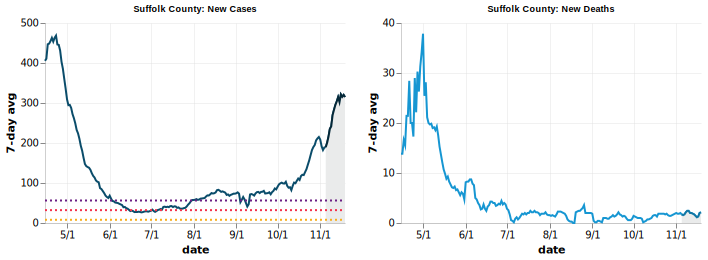

In [7]:
c = "Suffolk"
plot_charts(jhu, c)

<a id='new_york'></a>

#### New York City (New York, NY)

As of 11/19/20, there were **41,263** total cases and **3,217** total deaths. <br>In the past week, new cases grew by **30.6%**; new deaths went from **-0.1** to **2.4**. <br>In the past week, the doubling time went from **101 days** to **88 days** <i><span style='color:#797C7C'>(longer doubling time is better)</span></i>. 

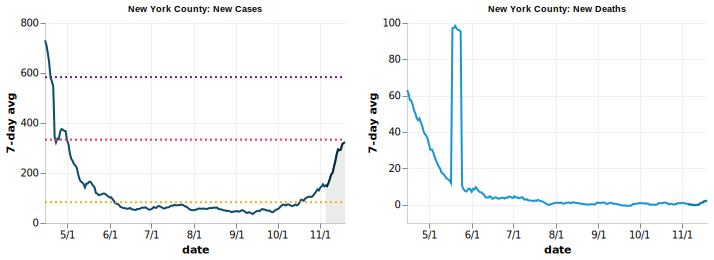

In [8]:
c = "New York"
plot_charts(jhu, c)

<a id='philadelphia'></a>

#### Philadelphia (Philadelphia, PA)

As of 11/19/20, there were **58,012** total cases and **1,945** total deaths. <br>In the past week, new cases grew by **41.4%**; new deaths went from **2.9** to **5.9**. <br>In the past week, the doubling time went from **54 days** to **44 days** <i><span style='color:#797C7C'>(longer doubling time is better)</span></i>. 

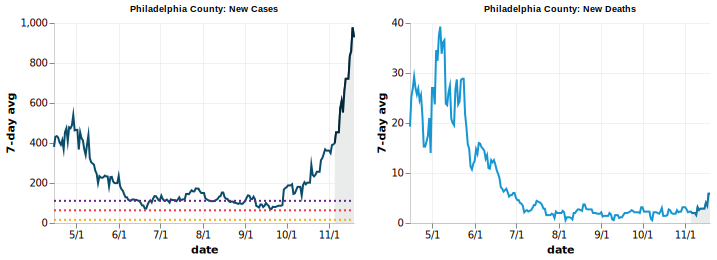

In [9]:
c = "Philadelphia"
plot_charts(jhu, c)

<a id='pittsburgh'></a>

#### Pittsburgh (Allegheny, PA)

As of 11/19/20, there were **22,043** total cases and **462** total deaths. <br>In the past week, new cases grew by **53.0%**; new deaths went from **1.4** to **3.1**. <br>In the past week, the doubling time went from **39 days** to **29 days** <i><span style='color:#797C7C'>(longer doubling time is better)</span></i>. 

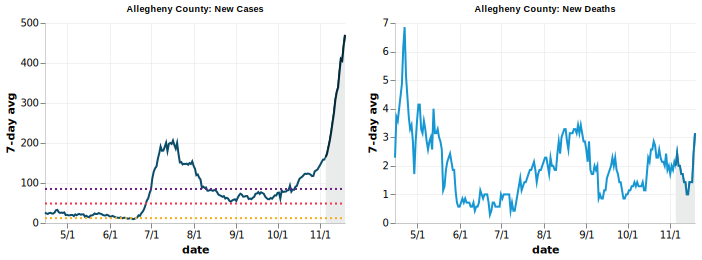

In [10]:
c = "Allegheny"
plot_charts(jhu, c)

## Mid-Atlantic

<a id='dc'></a>

#### Washington DC (District of Columbia, DC)

As of 11/19/20, there were **19,678** total cases and **667** total deaths. <br>In the past week, new cases grew by **41.9%**; new deaths went from **1.0** to **1.4**. <br>In the past week, the doubling time went from **106 days** to **79 days** <i><span style='color:#797C7C'>(longer doubling time is better)</span></i>. 

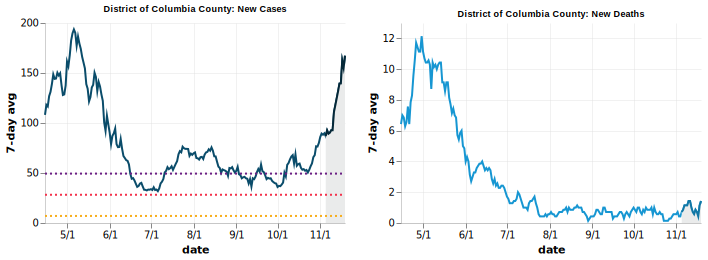

In [11]:
c = "District of Columbia"
plot_charts(jhu, c)

<a id='arlington'></a>

#### Arlington (Arlington, VA)

As of 11/19/20, there were **5,544** total cases and **156** total deaths. <br>In the past week, new cases grew by **35.0%**; new deaths went from **0.1** to **0.1**. <br>In the past week, the doubling time went from **88 days** to **63 days** <i><span style='color:#797C7C'>(longer doubling time is better)</span></i>. 

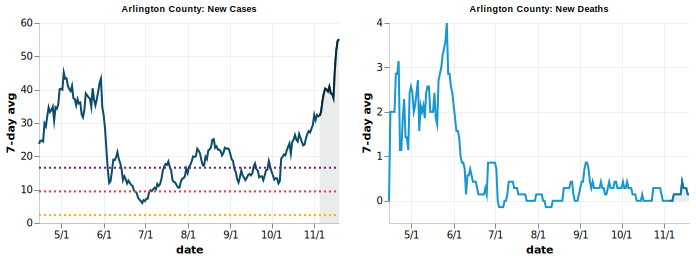

In [12]:
c = "Arlington"
plot_charts(jhu, c)

<a id='fairfax'></a>

#### Fairfax (Fairfax, VA)

As of 11/19/20, there were **27,475** total cases and **612** total deaths. <br>In the past week, new cases grew by **14.9%**; new deaths went from **0.6** to **0.4**. <br>In the past week, the doubling time went from **97 days** to **83 days** <i><span style='color:#797C7C'>(longer doubling time is better)</span></i>. 

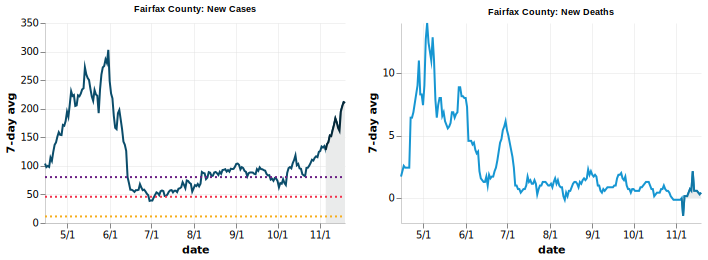

In [13]:
c = "Fairfax"
plot_charts(jhu, c)

<a id='richmond'></a>

#### Richmond (Richmond City, VA)

As of 11/19/20, there were **6,159** total cases and **80** total deaths. <br>In the past week, new cases grew by **4.3%**; new deaths went from **0.0** to **0.3**. <br>In the past week, the doubling time went from **97 days** to **100 days** <i><span style='color:#797C7C'>(longer doubling time is better)</span></i>. 

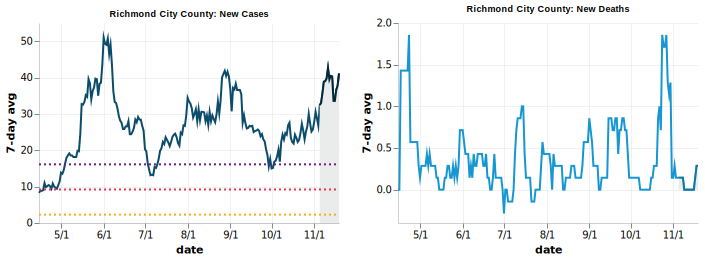

In [14]:
c = "Richmond City"
plot_charts(jhu, c)

## Midwest

<a id='chicago'></a>

#### Chicago (Cook, IL)

As of 11/19/20, there were **268,284** total cases and **6,148** total deaths. <br>In the past week, new cases grew by **-0.5%**; new deaths grew by **-17.8%**. <br>In the past week, the doubling time went from **35 days** to **41 days** <i><span style='color:#797C7C'>(longer doubling time is better)</span></i>. 

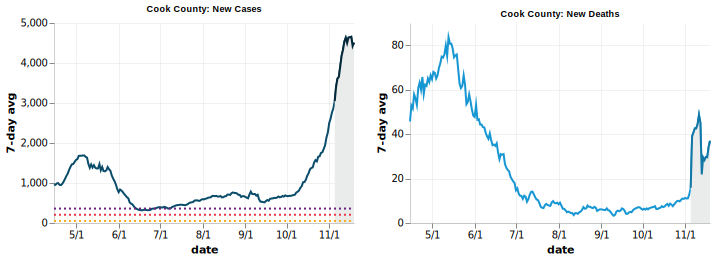

In [15]:
c = "Cook"
plot_charts(jhu, c)

<a id='cincinnati'></a>

#### Cincinnati (Hamilton, OH)

As of 11/19/20, there were **27,106** total cases and **368** total deaths. <br>In the past week, new cases grew by **56.2%**; new deaths went from **1.1** to **1.1**. <br>In the past week, the doubling time went from **39 days** to **27 days** <i><span style='color:#797C7C'>(longer doubling time is better)</span></i>. 

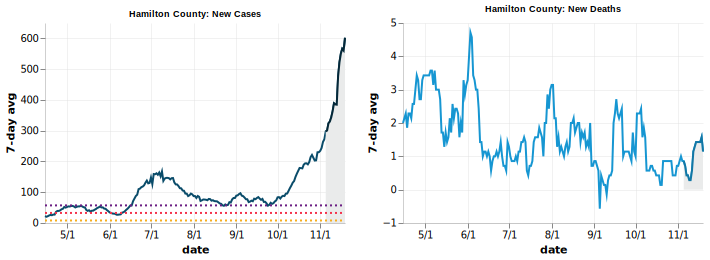

In [16]:
c = "Hamilton"
plot_charts(jhu, c)

<a id='lexington'></a>

#### Lexington (Fayette, KY)

As of 11/19/20, there were **14,663** total cases and **102** total deaths. <br>In the past week, new cases grew by **12.0%**; new deaths went from **0.3** to **0.9**. <br>In the past week, the doubling time went from **46 days** to **48 days** <i><span style='color:#797C7C'>(longer doubling time is better)</span></i>. 

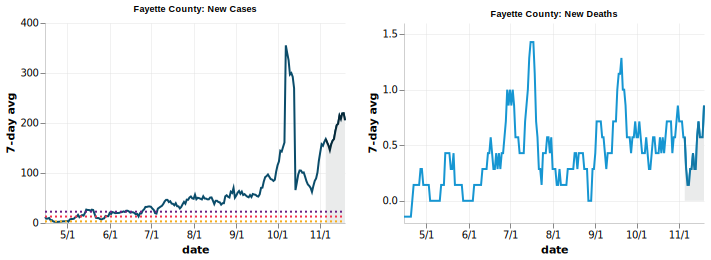

In [17]:
c = "Fayette"
plot_charts(jhu, c)

<a id='minneapolis'></a>

#### Minneapolis (Hennepin, MN)

As of 11/19/20, there were **54,662** total cases and **1,066** total deaths. <br>In the past week, new cases grew by **18.7%**; new deaths went from **3.0** to **4.7**. <br>In the past week, the doubling time went from **30 days** to **30 days** <i><span style='color:#797C7C'>(longer doubling time is better)</span></i>. 

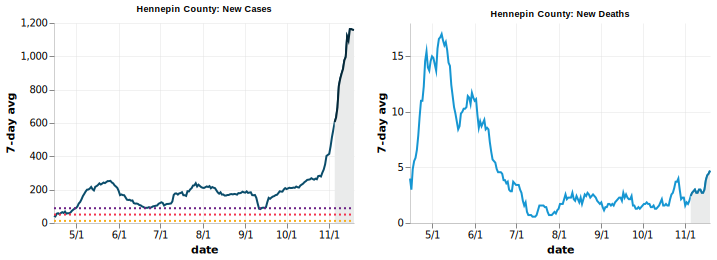

In [18]:
c = "Hennepin"
plot_charts(jhu, c)

<a id='st_louis'></a>

#### St Louis (St. Louis, MO)

As of 11/19/20, there were **44,194** total cases and **927** total deaths. <br>In the past week, new cases grew by **18.6%**; new deaths went from **2.3** to **2.3**. <br>In the past week, the doubling time went from **38 days** to **37 days** <i><span style='color:#797C7C'>(longer doubling time is better)</span></i>. 

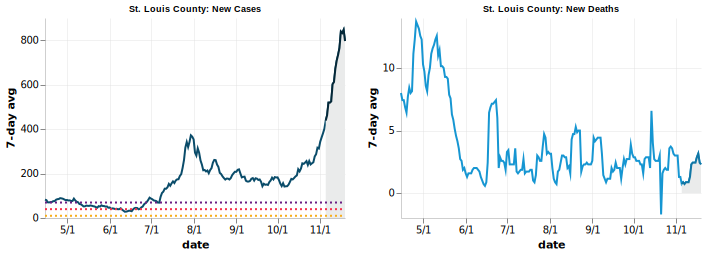

In [19]:
c = "St. Louis"
plot_charts(jhu, c)

## Southeast / South

<a id='charlotte'></a>

#### Charlotte (Mecklenburg, NC)

As of 11/19/20, there were **39,556** total cases and **426** total deaths. <br>In the past week, new cases grew by **20.5%**; new deaths went from **1.4** to **2.0**. <br>In the past week, the doubling time went from **98 days** to **83 days** <i><span style='color:#797C7C'>(longer doubling time is better)</span></i>. 

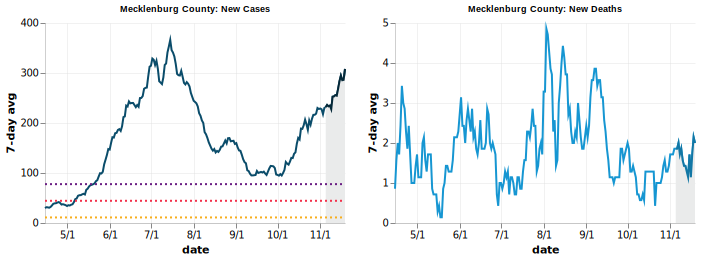

In [20]:
c = "Mecklenburg"
plot_charts(jhu, c)

<a id='columbia'></a>

#### Columbia (Richland, SC)

As of 11/19/20, there were **19,315** total cases and **291** total deaths. <br>In the past week, new cases grew by **16.2%**; new deaths went from **0.7** to **1.3**. <br>In the past week, the doubling time went from **136 days** to **124 days** <i><span style='color:#797C7C'>(longer doubling time is better)</span></i>. 

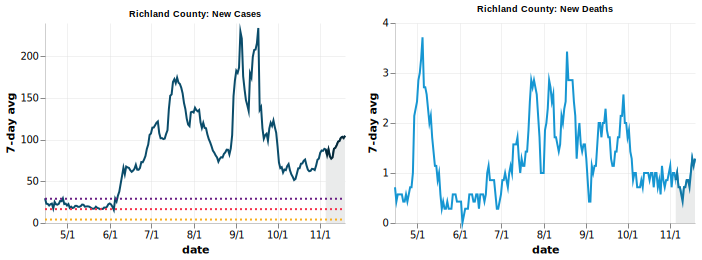

In [21]:
c = "Richland"
plot_charts(jhu, c)

<a id='memphis'></a>

#### Memphis (Shelby, TN)

As of 11/19/20, there were **44,374** total cases and **625** total deaths. <br>In the past week, new cases grew by **28.6%**; new deaths went from **3.7** to **2.7**. <br>In the past week, the doubling time went from **71 days** to **64 days** <i><span style='color:#797C7C'>(longer doubling time is better)</span></i>. 

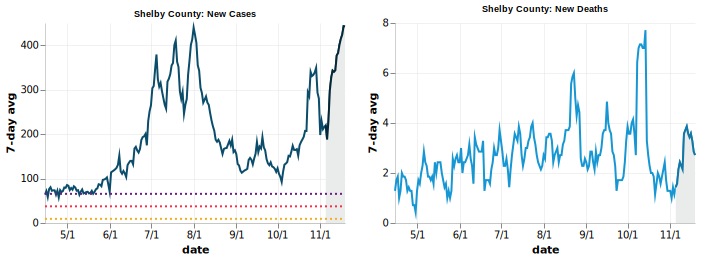

In [22]:
c = "Shelby"
plot_charts(jhu, c)

<a id='nashville'></a>

#### Nashville (Davidson, TN)

As of 11/19/20, there were **39,405** total cases and **393** total deaths. <br>In the past week, new cases grew by **3.6%**; new deaths went from **2.0** to **2.7**. <br>In the past week, the doubling time went from **61 days** to **66 days** <i><span style='color:#797C7C'>(longer doubling time is better)</span></i>. 

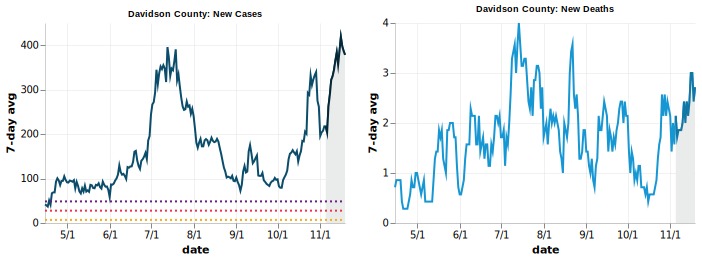

In [23]:
c = "Davidson"
plot_charts(jhu, c)

<a id='atlanta'></a>

#### Atlanta (Fulton, GA)

As of 11/19/20, there were **37,638** total cases and **679** total deaths. <br>In the past week, new cases grew by **31.9%**; new deaths went from **2.3** to **0.7**. <br>In the past week, the doubling time went from **119 days** to **93 days** <i><span style='color:#797C7C'>(longer doubling time is better)</span></i>. 

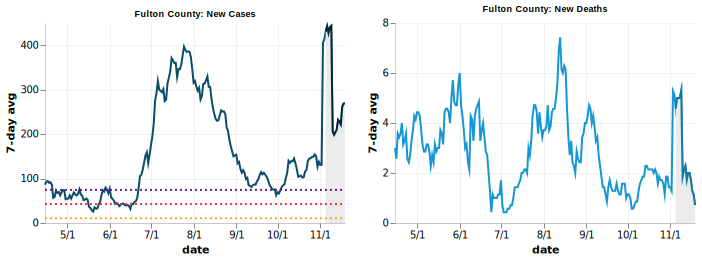

In [24]:
c = "Fulton"
plot_charts(jhu, c)

<a id='orlando'></a>

#### Orlando (Orange, FL)

As of 11/19/20, there were **53,384** total cases and **619** total deaths. <br>In the past week, new cases grew by **53.3%**; new deaths went from **4.7** to **2.7**. <br>In the past week, the doubling time went from **113 days** to **73 days** <i><span style='color:#797C7C'>(longer doubling time is better)</span></i>. 

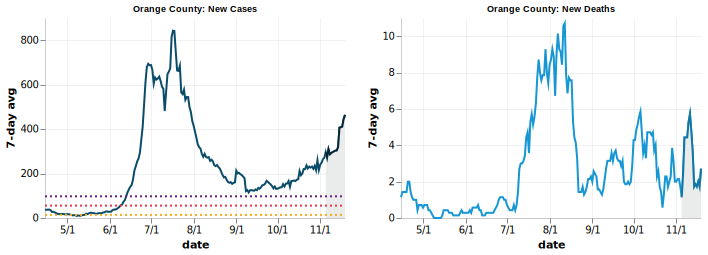

In [25]:
c = "Orange"
plot_charts(jhu, c)

<a id='austin'></a>

#### Austin (Travis, TX)

As of 11/19/20, there were **35,616** total cases and **473** total deaths. <br>In the past week, new cases grew by **36.6%**; new deaths went from **1.3** to **1.1**. <br>In the past week, the doubling time went from **135 days** to **103 days** <i><span style='color:#797C7C'>(longer doubling time is better)</span></i>. 

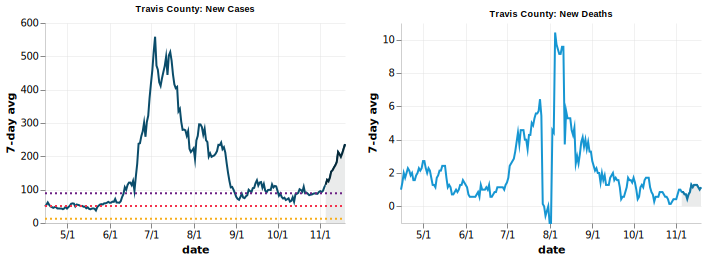

In [26]:
c = "Travis"
plot_charts(jhu, c)

<a id='dallas'></a>

#### Dallas (Dallas, TX)

As of 11/19/20, there were **113,764** total cases and **1,429** total deaths. <br>In the past week, new cases grew by **20.3%**; new deaths went from **9.7** to **9.7**. <br>In the past week, the doubling time went from **71 days** to **61 days** <i><span style='color:#797C7C'>(longer doubling time is better)</span></i>. 

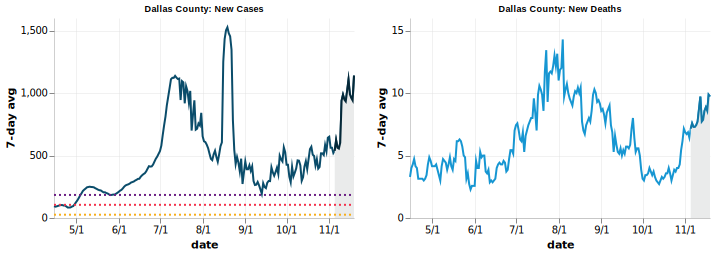

In [27]:
c = "Dallas"
plot_charts(jhu, c)

<a id='houston'></a>

#### Houston (Harris, TX)

As of 11/19/20, there were **178,811** total cases and **2,943** total deaths. <br>In the past week, new cases grew by **3.5%**; new deaths went from **6.3** to **6.9**. <br>In the past week, the doubling time went from **118 days** to **121 days** <i><span style='color:#797C7C'>(longer doubling time is better)</span></i>. 

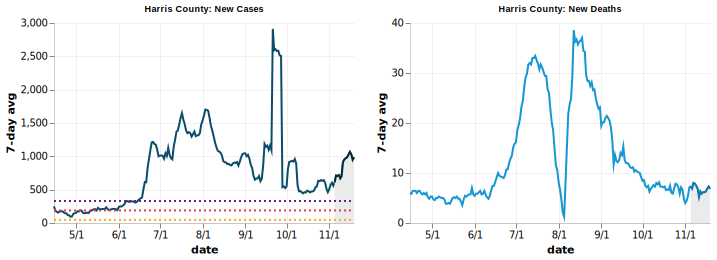

In [28]:
c = "Harris"
plot_charts(jhu, c)

## Northwest / West

<a id='portland'></a>

#### Portland (Multnomah, OR)

As of 11/19/20, there were **13,725** total cases and **208** total deaths. <br>In the past week, new cases grew by **-2.9%**; new deaths went from **1.9** to **2.7**. <br>In the past week, the doubling time went from **33 days** to **40 days** <i><span style='color:#797C7C'>(longer doubling time is better)</span></i>. 

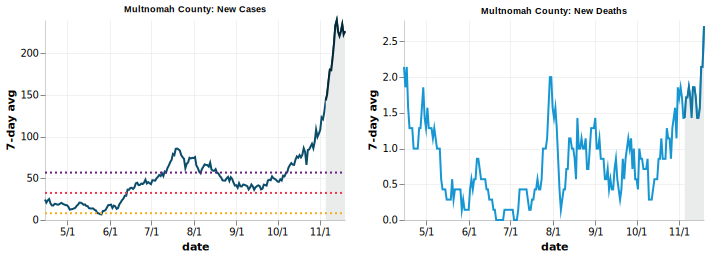

In [29]:
c = "Multnomah"
plot_charts(jhu, c)

<a id='seattle'></a>

#### Seattle (King, WA)

As of 11/19/20, there were **36,471** total cases and **846** total deaths. <br>In the past week, new cases grew by **26.6%**; new deaths went from **2.3** to **1.1**. <br>In the past week, the doubling time went from **49 days** to **42 days** <i><span style='color:#797C7C'>(longer doubling time is better)</span></i>. 

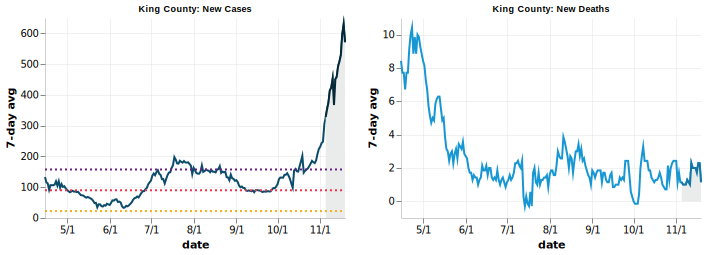

In [30]:
c = "King"
plot_charts(jhu, c)

<a id='phoenix'></a>

#### Phoenix (Maricopa, AZ)

As of 11/19/20, there were **183,177** total cases and **3,850** total deaths. <br>In the past week, new cases grew by **56.5%**; new deaths grew by **4.6%**. <br>In the past week, the doubling time went from **106 days** to **72 days** <i><span style='color:#797C7C'>(longer doubling time is better)</span></i>. 

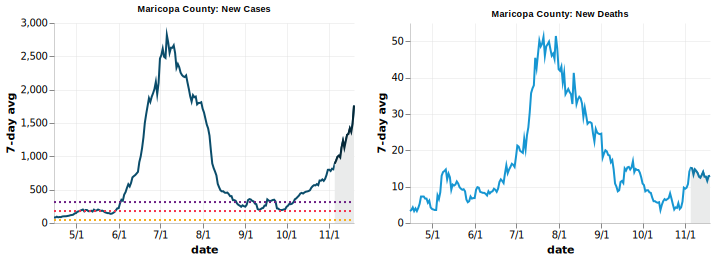

In [31]:
c = "Maricopa"
plot_charts(jhu, c)

<a id='las_vegas'></a>

#### Las Vegas (Clark, NV)

As of 11/19/20, there were **100,552** total cases and **1,647** total deaths. <br>In the past week, new cases grew by **39.8%**; new deaths went from **6.0** to **7.7**. <br>In the past week, the doubling time went from **72 days** to **54 days** <i><span style='color:#797C7C'>(longer doubling time is better)</span></i>. 

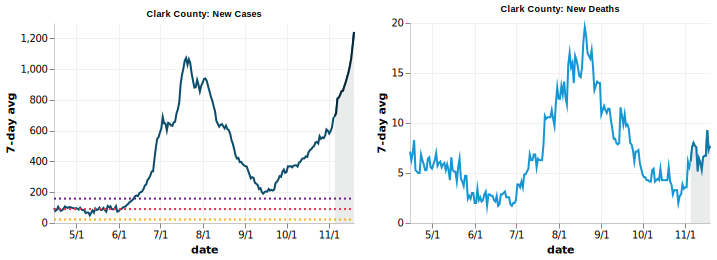

In [32]:
c = "Clark"
plot_charts(jhu, c)

<a id='salt_lake_city'></a>

#### Salt Lake City (Salt Lake, UT)

As of 11/19/20, there were **69,503** total cases and **363** total deaths. <br>In the past week, new cases grew by **12.1%**; new deaths went from **3.0** to **3.1**. <br>In the past week, the doubling time went from **37 days** to **35 days** <i><span style='color:#797C7C'>(longer doubling time is better)</span></i>. 

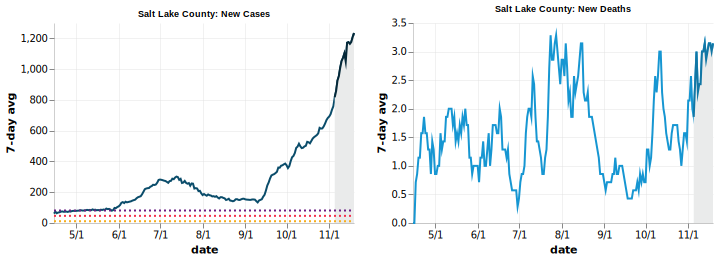

In [33]:
c = "Salt Lake"
plot_charts(jhu, c)

<a id='denver'></a>

#### Denver (Denver, CO)

As of 11/19/20, there were **30,321** total cases and **492** total deaths. <br>In the past week, new cases grew by **19.5%**; new deaths went from **1.0** to **4.3**. <br>In the past week, the doubling time went from **29 days** to **30 days** <i><span style='color:#797C7C'>(longer doubling time is better)</span></i>. 

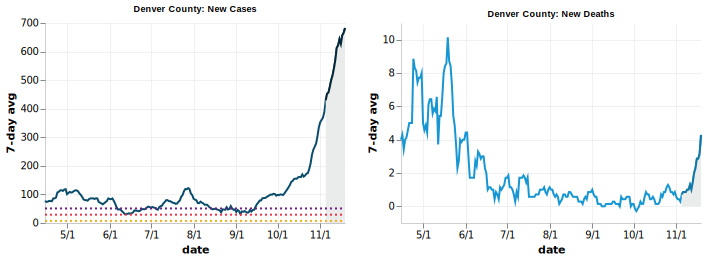

In [34]:
c = "Denver"
plot_charts(jhu, c)